#Analisis visualización de datos

*Conjunto de datos - Lanzamientos Espaciales*

Realizado por: **Luis Felipe Sanchez Sanchez**

Contexto creado:

encontrarás un conjunto de datos increíblemente completo que incluye todas las misiones espaciales desde el comienzo de la carrera espacial entre los EE. UU. y la Unión Soviética en 1957. Contiene datos sobre el estado de la misión (éxito/fracaso), el costo de la misión, la cantidad de lanzamientos por país y mucho más. Hay mucho que podemos aprender de este conjunto de datos sobre las organizaciones dominantes y las tendencias a lo largo del tiempo.

[Fuente del dataset](https://colab.research.google.com/drive/1QpU-mYQ8fpigB0BTvZjpNaOZmFVIN7Mq)

##Conexión con google drive

In [1]:
#conectamos con el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importación de librerias

In [2]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importamos el dataset
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Analisis-Lanzamientos-Espaciales/mission_launches.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [7]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Organisation,object
Location,object
Date,object
Detail,object
Rocket_Status,object
Price,object
Mission_Status,object


##Validación de datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [8]:
#Iniciamos con tratamiento de datos
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [10]:
#Eliminamos la columna Unnamed: 0.1 del dataset
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [12]:
#cambiamos el nombre de Unnamed: 0, a ID
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [13]:
df

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...
4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


##Tratamiento y limpieza de datos faltantes

In [106]:
#validamos medidas estandar de cada columna

In [26]:
df['Price'].describe()

,Price
count,964
unique,56
top,450.0
freq,136


In [27]:
#eliminamos todas las filas donde la celda Price sea null
df.dropna(subset=['Price'], inplace=True)

In [28]:
#validamos nuevamente si existen datos faltantes
df.isnull().sum()

,0
ID,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0


In [31]:
df.isna()
#comprobamos que ya no hay valores True

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3855,False,False,False,False,False,False,False,False
3971,False,False,False,False,False,False,False,False
3993,False,False,False,False,False,False,False,False
4000,False,False,False,False,False,False,False,False


##Analisis de datos

In [32]:
#Cual es la organización que mas lanzamientos tuvo
df['Organisation'].value_counts()

,count
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


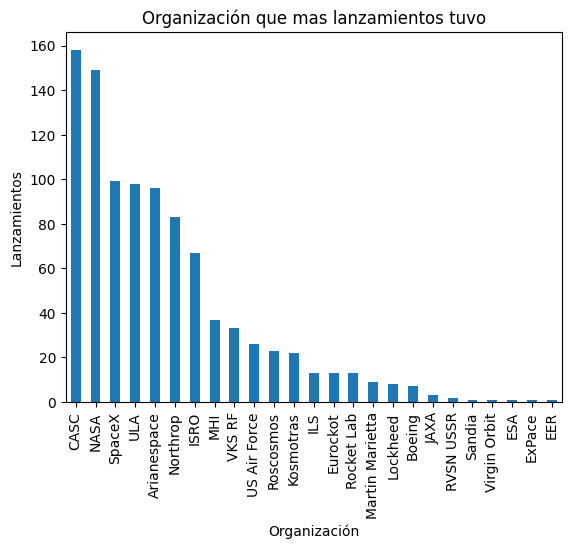

In [33]:
#Graficamos lo interior
df['Organisation'].value_counts().plot(kind='bar')
plt.title('Organización que mas lanzamientos tuvo')
plt.xlabel('Organización')
plt.ylabel('Lanzamientos')
plt.show()

In [51]:
#Para saber cuantos vuelos se hicieron por año debemos separar el año de la columna date, debido a la forma en la que viene la columna
#agreamos una nueva columna llamada AñoLanzamiento y tomamos el año de la columna Date
df['AñoLanzamiento'] = df['Date'].str.split(',').str[1].str.split().str[0]

In [52]:
df

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,AñoLanzamiento
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020
...,...,...,...,...,...,...,...,...,...
3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,1966
3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1965
3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,1965
4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,1964


In [54]:
#Cuantos vuelos se hicieron por año
df['AñoLanzamiento'].value_counts()

,count
AñoLanzamiento,
2018,88
2019,73
2017,66
2016,64
2020,52
2014,41
2015,39
2013,33
2009,31


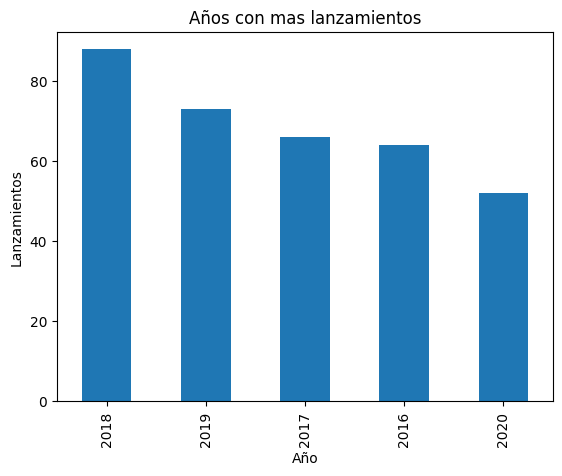

In [56]:
#Graficamos los 5 años con mas vuelos y su cantidad
df['AñoLanzamiento'].value_counts().head(5).plot(kind='bar')
plt.title('Años con mas lanzamientos')
plt.xlabel('Año')
plt.ylabel('Lanzamientos')
plt.show()

In [57]:
#¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
df['Price'].describe()

,Price
count,964
unique,56
top,450.0
freq,136


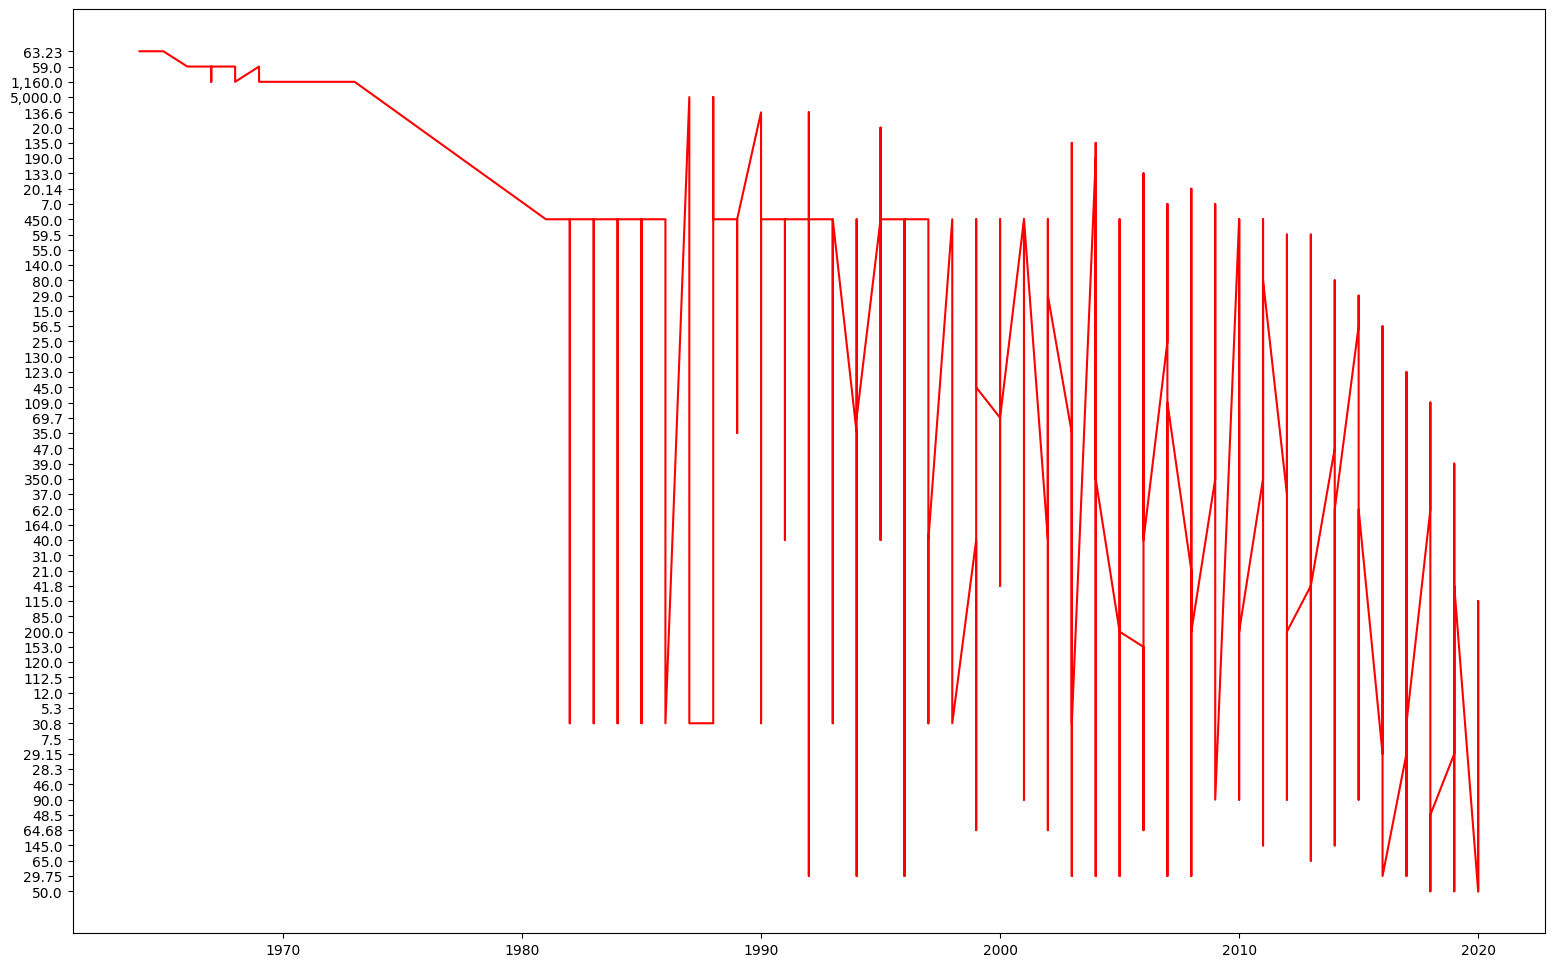

In [75]:
fig, axes = plt.subplots(figsize=(19,12))
axes.plot(df['AñoLanzamiento'],df['Price'],'r')

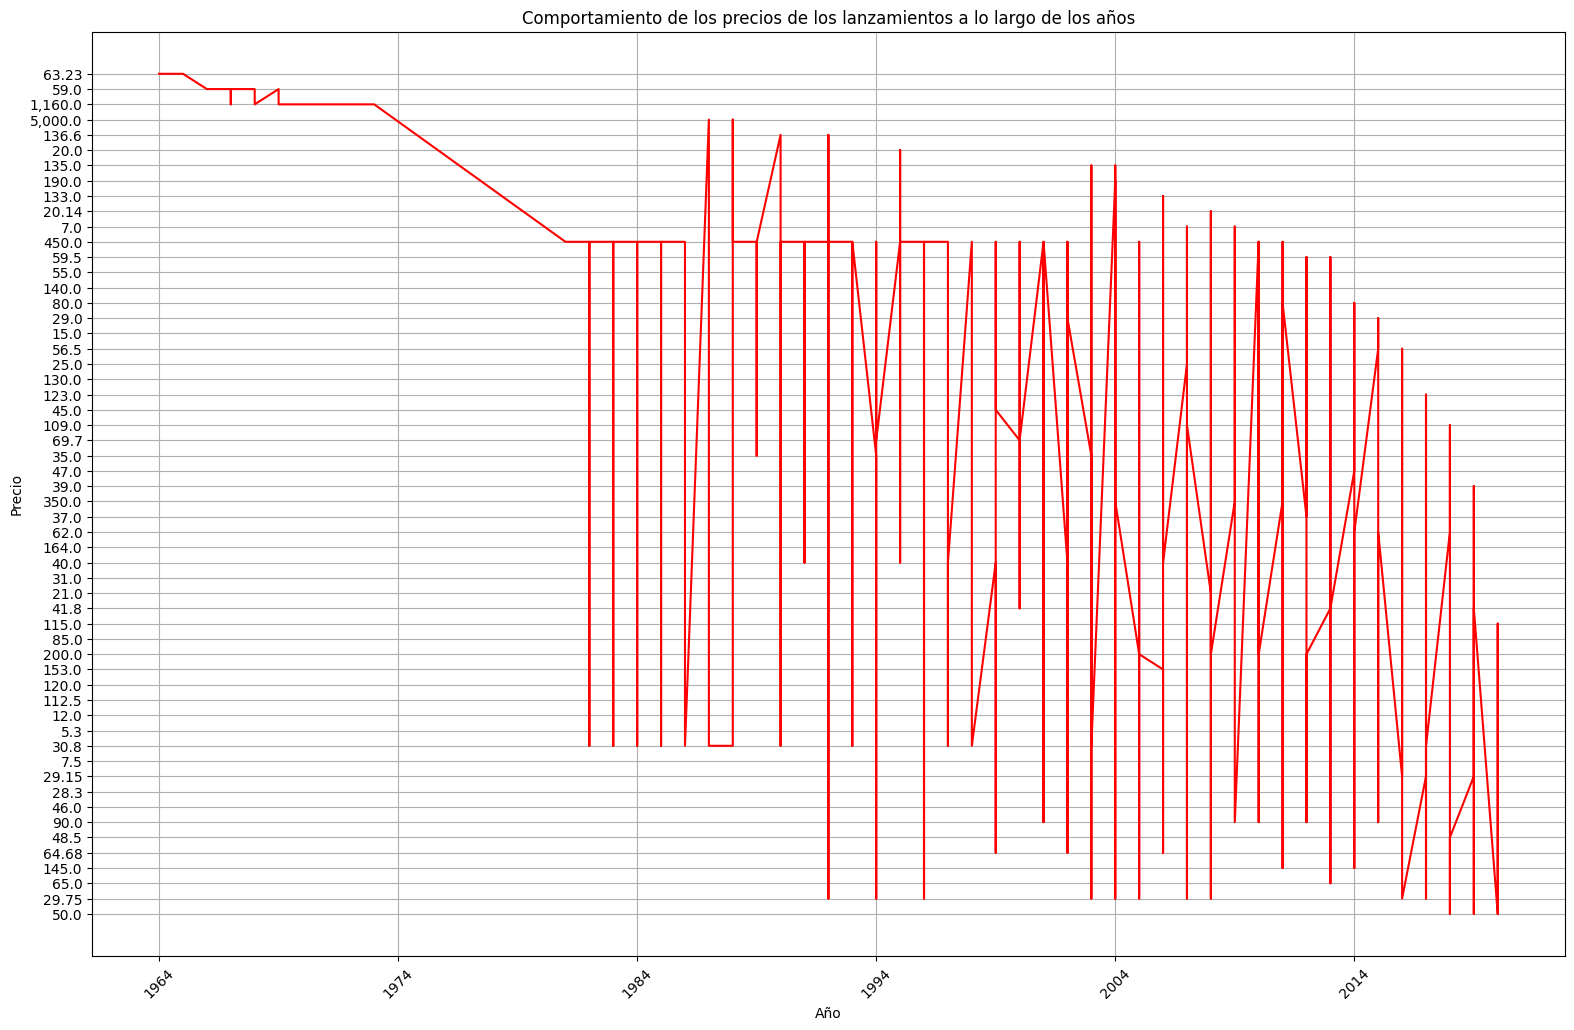

In [77]:

# Crear la figura y los ejes
fig, axes = plt.subplots(figsize=(19, 12))

# Graficar el comportamiento de los precios
axes.plot(df['AñoLanzamiento'], df['Price'], 'r')

# Establecer los límites del eje x
min_year = df['AñoLanzamiento'].min()
max_year = df['AñoLanzamiento'].max()

# Establecer los ticks en intervalos de 10 años
ticks = range(min_year, max_year + 1, 10)
axes.set_xticks(ticks)

# Rotar las etiquetas para mayor legibilidad
axes.set_xticklabels(ticks, rotation=45)

# Títulos y etiquetas
axes.set_title('Comportamiento de los precios de los lanzamientos a lo largo de los años')
axes.set_xlabel('Año')
axes.set_ylabel('Precio')

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [80]:
#Cual es el mes con mas lanzamientos
#Para este caso debemos realizar lo mismo que con los años, solo que esta vez con los meses
df['MesLanzamiento'] = df['Date'].str.split(',').str[0].str.split().str[1]

In [81]:
df

,ID,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,AñoLanzamiento,MesLanzamiento
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,Aug
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,Aug
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,Jul
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,Jul
5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,Jul
...,...,...,...,...,...,...,...,...,...,...
3855,3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Fri Jul 29, 1966 18:43 UTC",Titan IIIB | KH-8,StatusRetired,59.0,Success,1966,Jul
3971,3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1965,May
3993,3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,1965,Feb
4000,4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,1964,Dec


In [82]:
#Realizamos el conteo de lanzamientos por meses
df['MesLanzamiento'].value_counts()

,count
MesLanzamiento,
Dec,92
Apr,91
Sep,88
May,86
Jun,85
Oct,83
Aug,82
Jul,77
Mar,77


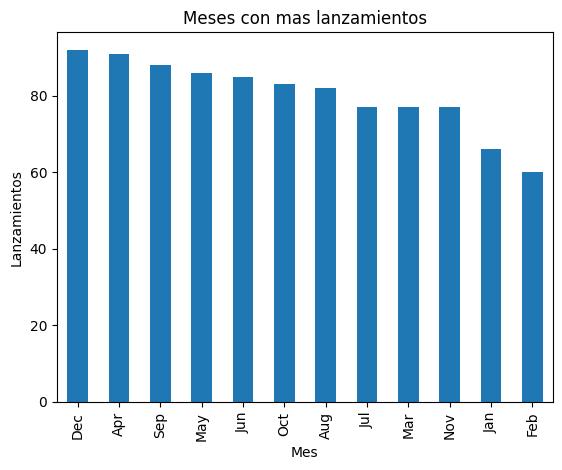

In [83]:
#Graficamos lo antetior
df['MesLanzamiento'].value_counts().plot(kind='bar')
plt.title('Meses con mas lanzamientos')
plt.xlabel('Mes')
plt.ylabel('Lanzamientos')
plt.show()

In [84]:
#A que porcentaje equivale cada uno
df['MesLanzamiento'].value_counts(normalize=True)
#

,proportion
MesLanzamiento,
Dec,0.095436
Apr,0.094398
Sep,0.091286
May,0.089212
Jun,0.088174
Oct,0.086100
Aug,0.085062
Jul,0.079876
Mar,0.079876


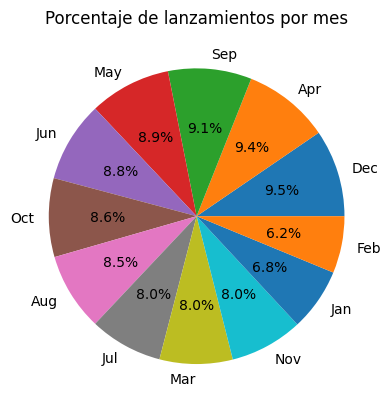

In [85]:
plt.pie(df['MesLanzamiento'].value_counts(), labels=df['MesLanzamiento'].value_counts().index, autopct='%1.1f%%')
plt.title('Porcentaje de lanzamientos por mes')
plt.show()


In [86]:
#Cuantas misiones fueron fallidas y cuantas fueron exitosas
df['Mission_Status'].value_counts()

,count
Mission_Status,
Success,910
Failure,36
Partial Failure,17
Prelaunch Failure,1


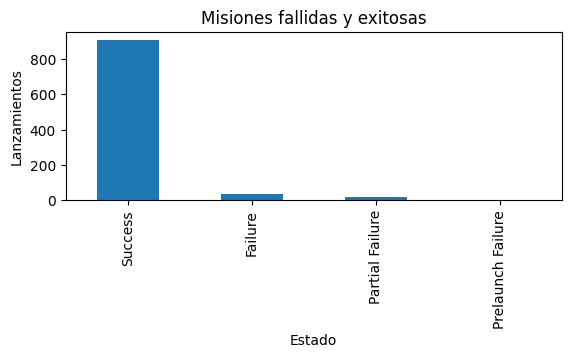

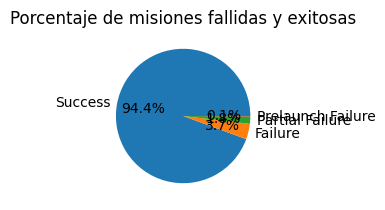

In [105]:
#graficamos lo antetior
plt.subplot(2,1,1) # Grafico 1
df['Mission_Status'].value_counts().plot(kind='bar')
plt.title('Misiones fallidas y exitosas')
plt.xlabel('Estado')
plt.ylabel('Lanzamientos')
plt.show()

plt.subplot(2,1,2) # Grafico 1
#lo mostramos en grafico de pie
plt.pie(df['Mission_Status'].value_counts(), labels=df['Mission_Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Porcentaje de misiones fallidas y exitosas')
plt.show()

In [94]:
#Cuantas misiones fueron exitosas por año
seg=df[df['Mission_Status'] == 'Success']['AñoLanzamiento'].value_counts().sort_index(ascending=False)
df[df['Mission_Status'] == 'Success']['AñoLanzamiento'].value_counts().sort_index(ascending=False)

,count
AñoLanzamiento,
2020,48
2019,71
2018,87
2017,62
2016,61
2015,37
2014,40
2013,31
2012,24


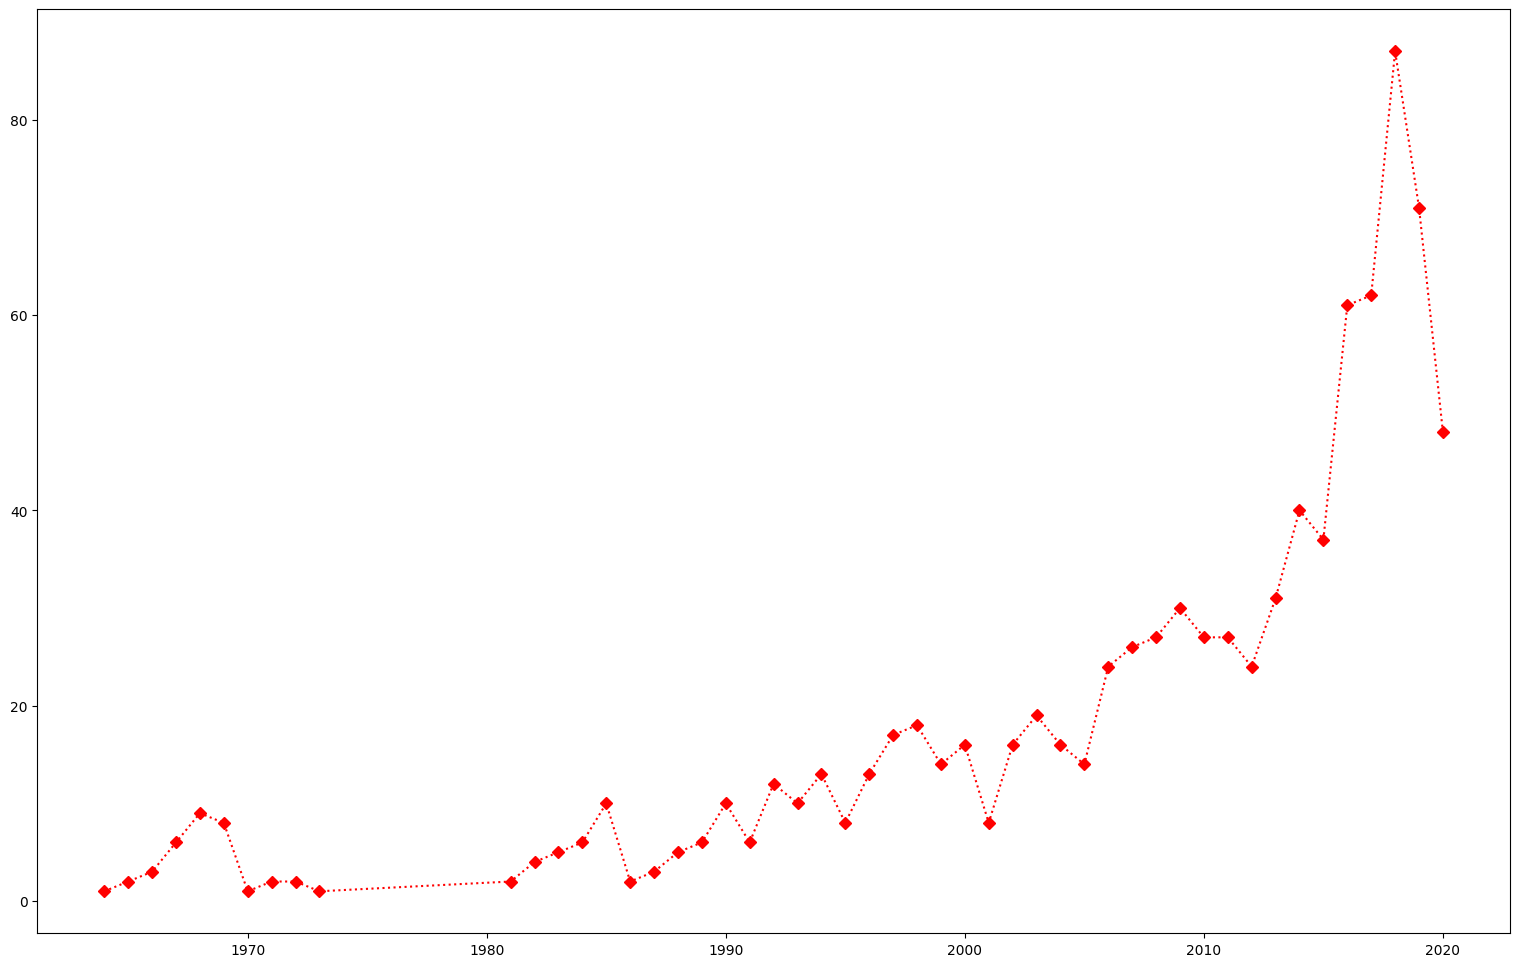

In [99]:
#Cantidad de misiones exitosas por año
fig, axes = plt.subplots(figsize=(19,12))
axes.plot(seg,'rD:')